# Dimensionality Reduction

There are two types of Dimensionality Reduction techniques:
1. Feature Selection: (see [Part 2 - Regression])    
    * Backward Elimination
    * Forward Selection
    * Bidirectional Elimination
    * Score Comparison
2. Feature Extraction: 
    * Principal Component Analysis (PCA)
    * Linear Discriminant Analysis (LDA)
    * Kernel PCA

1.) PCA and LDA are not guaranteed to improve models.<br>
2.) PCA and LDA are often used when you want to reduce the number of variables in your model to computation more efficient, but still keep a accurate model.<br>
3.) PCA and LDA usually work on both linear and non-linear data.

## Principal Component Analysis (PCA)

PCA is considered to be one of the most used **Unsupervised** algorithms (most popular one to use). From the $m$ independent variables of the dataset, PCA extracts $p≤m$ new independent variables that explain the most the variance of the dataset, regardless of the dependent variable.

The goal of PCA is to:
* Identify patterns in data
* Detect the correlation between variables (To reduce the dimensionality for the strong correlation)

Reduce the dimensions of a $d$-dimensional dataset by projecting it onto a ($k$)-dimensional subspace (where $k<d$)

##### [A Summary of the PCA Approach](https://plot.ly/ipython-notebooks/principal-component-analysis/):
* Standardize the data.
* Obtain the Eigenvectors and Eigenvalues from the covariance matrix or correlation matrix, or perform Singular Vector Decomposition.
* Sort eigenvalues in descending order and choose the $k$ eigenvectors that correspond to the $k$ largest eigenvalues where k is the number of dimensions of the new feature subspace ($k≤d$)/.
* Construct the projection matrix $W$ from the selected $k$ eigenvectors.
* Transform the original dataset $X$ via $W$ to obtain a $k$-dimensional feature subspace $Y$.

[Visualization of PCA Approach](http://setosa.io/ev/principal-component-analysis/)

* PCA learns about the relationship between $X$ and $Y$ values
* Find list of principal axes

##### [如何通俗易懂地讲解什么是 PCA 主成分分析？](https://www.zhihu.com/question/41120789)
主元分析也就是PCA，主要用于数据降维。

**什么是降维？**
采集了房屋的价格和面积，可以看出两者完全正相关，有一列其实是多余的：<br>
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%209%20-%20Dimensionality%20Reduction/pca_1.JPG?raw=true' width='300'><br>
$\overline{X}$是均值，以$\overline{X}$为原点($0$)，那么上面表格中数字全部减去均值：(中心化)<br>
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%209%20-%20Dimensionality%20Reduction/pca_2.JPG?raw=true' width='300'><br>
把这个二维数据画在坐标轴上，横纵坐标分别为“房价”、“面积”，可以看出它们排列为一条直线：<br>
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%209%20-%20Dimensionality%20Reduction/pca_3.JPG?raw=true' width='200'><br>
旋转后的坐标系，横纵坐标不再代表“房价”、“面积”了，而是两者的混合（术语是线性组合），这里把它们称作“主元1”、“主元2”，坐标值很容易用勾股定理计算出来，比如$a$在“主元1”的坐标值为：<br>
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%209%20-%20Dimensionality%20Reduction/pca_4.JPG?raw=true' width='200'><br>
很显然$a$在“主元2”上的坐标为$0$，把所有的数字换算到新的坐标系上：<br>
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%209%20-%20Dimensionality%20Reduction/pca_5.JPG?raw=true' width='200'><br>
因为“主元2”全都为0，完全是多余的，我们只需要“主元1”就够了，这样就又把数据降为了一维，而且没有丢失任何信息。

**非理想情况如何降维？**
现实中虽然正比，但总会有些出入，虽然数据看起来很接近一条直线，但是终究不在一条直线上：<br>
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%209%20-%20Dimensionality%20Reduction/pca_6.JPG?raw=true' width='500'><br>

**主元分析（PCA）**
按列解读得到两个向量：<br>
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%209%20-%20Dimensionality%20Reduction/pca_7.JPG?raw=true' width='200'><br>
组成协方差矩阵：$Q = \frac{1}{n}P = \left(\begin{array}{rr}Var(X) & Cov(X,Y) \\Cov(X,Y) & Var(Y) \\\end{array}\right) = \frac{1}{5}\left(\begin{array}{rr}X\cdot X & X\cdot Y \\X\cdot Y & Y\cdot Y \\\end{array}\right)= \frac{1}{5}\left(\begin{array}{rr}57.2 & 45.2 \\45.2 & 36.7 \\\end{array}\right)
$<br>
进行奇异值分解：<br>
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%209%20-%20Dimensionality%20Reduction/pca_9.JPG?raw=true' width='200'>
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%209%20-%20Dimensionality%20Reduction/pca_11.JPG?raw=true' width='400'><br>
根据之前的分析，主元1应该匹配最大奇异值对应的奇异向量，主元2匹配最小奇异值对应的奇异向量，即：<br>
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%209%20-%20Dimensionality%20Reduction/pca_12.JPG?raw=true' width='200'><br>
以这两个为主元画出来的坐标系就是这样的：<br>
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%209%20-%20Dimensionality%20Reduction/pca_13.JPG?raw=true' width='200'><br>
如下算出新坐标，比如对于$a$ ：<br>
$X_1 = a\cdot e_1 = -6.94$<br>
$X_2 = a\cdot e_2 = 0.084$<br>
以此类推，得到新的数据表：<br>
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%209%20-%20Dimensionality%20Reduction/pca_14.JPG?raw=true' width='200'><br>
主元2整体来看，数值很小，丢掉损失的信息也非常少，这样就实现了非理想情况下的降维。

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:,:13].values
y = dataset.iloc[:,13].values

Feature Scaling must be applied to the Dimension Reduction Techniques like PCA or LDA

In [2]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

### Apply the PCA

n_components: The number of extracted features we want to get. Since we don't know how many principal components. Therefore, we put 'None' here first. We need the Explained Variance Vector to see how many principal components we need.

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
X = pca.fit_transform(X)

We need have a look at the cumulative explained variance of the different principal components, so we need create the explained variance vector which contains the % of variance explained by each of the principal components that we extracted here (from the most variance to least)

In [4]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In the case, we take only one principal component that will explain 36.7% of the variance. Then if we take two principal components that will explain 36.7% + 19.2% = 56% of the variance. In our example, we only need 2 principal variables, so we take 2.

In [5]:
pca = PCA(n_components=2)
X = pca.fit_transform(X) # Now X only has 2 independent variables

In [6]:
# Splitting the dataset into the Training and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [7]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

# Predict the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

C:\Users\XZV838\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\XZV838\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]], dtype=int64)

It's 3x3 confusion matrix (2x2: True and False Positive/Negative matrix), which has 3 classes (class 1,2,3)<br>
Only one error, which is "pred = 1 but actual = 0"

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


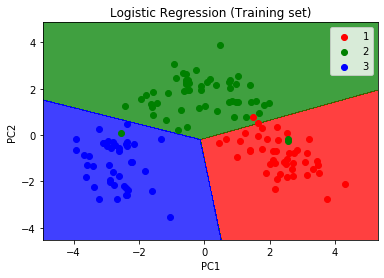

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


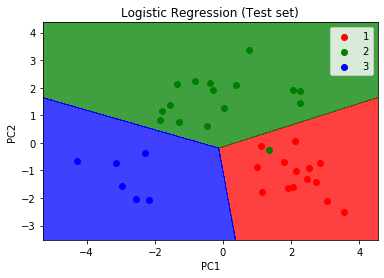

In [8]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

## Linear Discriminant Analysis (LDA)

LDA is like PCA, from the $n$ independent variables of the dataset. LDA extracts $p≤n$ new independent variables that separate the most the classes of the dependent variable. It means the dependent variable to proceed to the feature extraction technique. The fact that dependent variable is considered make s LDA a supervised model.

##### LDA for 2 categories
LDA uses the information from both X and Y axis to create a new axis, and it projects the data onto the new axis in a way to maximize the separation of the two categories<br>
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%209%20-%20Dimensionality%20Reduction/lda_2.JPG?raw=true' width='400'><br>
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%209%20-%20Dimensionality%20Reduction/lda_3.JPG?raw=true' width='400'><br>
The process is the same for n-dimensions with 2 categories: Create an axis that maximizes the distance between the means for the two categories while minimizig the scatter.
##### LDA for 3 categories
1) Find the point that is central to all of the data.<br>
2) Measure the distances between a point that is central in each category and the main central point<br>
3) Maximize the distance between each category and the central point while minimizing the scatter for each category<br>
<img src='https://github.com/yunjcai/Machine-Learning-A-Z/blob/master/Part%209%20-%20Dimensionality%20Reduction/lda_5.JPG?raw=true' width='400'><br>
The 2nd difference is LDA creates 2 axes to separate the data. This is because the 3 central points for each category define a plane.

##### [Summarizing the LDA approach in 5 steps](https://www.udemy.com/machinelearning/learn/lecture/10628136#questions)
* Compute the $d$-dimensional mean vectors for the different classes from the dataset.
* Compute the scatter matrices (in-between-class and within-class scatter matrix).
* Compute the eigenvectors ($e_1,e_2,...,e_d$) and corresponding eigenvalues ($λ_1,λ_2,...,λ_d$) for the scatter matrices.
* Sort the eigenvectors by decreasing eigenvalues and choose $k$ eigenvectors with the largest eigenvalues to form a $d$ x $k$ dimensional matrix $W$ (where every column represents an eigenvector).
* Use this d×k eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the matrix multiplication: $Y$ =$X$ × $W$ (where $X$ is a $n$ × $d$-dimensional matrix representing the $n$ samples, and $y$ are the transformed $n$ × $k$-dimensional samples in the new subspace).

In [9]:
# Importing the dataset
# Importing the dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:,:13].values
y = dataset.iloc[:,13].values

# Feature Scaling
sc = StandardScaler()
X = sc.fit_transform(X)

n_components means number of linear discriminants to extract the independent variables to separate the most classes of dependent variables. In the example, we try 2 first. So X becomes a matrix of two new features<br>

Since LDA is supervised model, when we use fit_transform our data. We also need dependent variables , because we are looking to separate the most different classes of the dependent variables.

In [10]:
# Applying the LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X = lda.fit_transform(X,y)

In [11]:
# Splitting the dataset into the Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

# Predict the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

C:\Users\XZV838\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\XZV838\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


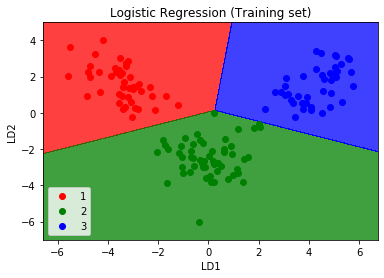

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


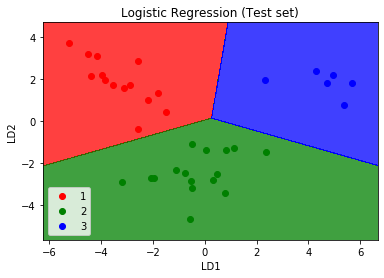

In [12]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

## Summary - LDA vs. PCA
LDA is like PCA - both are linear transformation techniques used to reduce dimensions. PCA is described as **unsupervised**, but LDA is **supervised** because of the relation to the dependent variable.
* PCA looks at the categories with the most variation.
* LDA tries to maximize the separation of known categories.

## Kernel PCA

Both PCA and LDA feature extraction techniques work on Linear Problems when the data is linearly separable.<br>

**Kernel PCA is adapted for nonlinear problem where the data is nonlinearly separable.**

Whenever PCA doesn't provide good result on the dataset. Therefore, it might be a dataset of a nonlinear problem. Then **Try Kernel PCA** 

**The dataset will be mapped to a higher dimension using Kernel trick. So it will create some new dimensions for new feature space where data will be linearly separable. Then PCA will be applied to reduce the dimensionality by extracting the new principal components.**

In [13]:
# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

n_components: The number of dimensions we want to get.<br>
kernel: Use Gaussian Kernel (rbf) which is the most commonly used

In [14]:
# Applying the Kernel PCA
from sklearn.decomposition import KernelPCA as KPCA
kpca = KPCA(n_components=2,kernel='rbf')
X = kpca.fit_transform(X)

In [15]:
# Splitting the dataset into the Training and Test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

# Predict the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

C:\Users\XZV838\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[54,  4],
       [ 3, 19]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


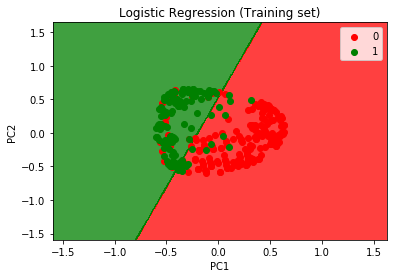

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


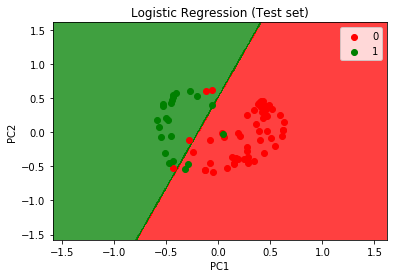

In [16]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()